In [2]:
import json
import os
from datetime import datetime
from collections import defaultdict

# Load the JSON file
json_file_path = 'xml_departamento_id_fecha.json'
with open(json_file_path, 'r') as f:
    data = json.load(f)

# Filter PDFs by month
pdfs_by_month = defaultdict(list)

for entry in data:
    date_str = entry['date']
    # Check if the date string is valid
    try:
        pdf_date = datetime.strptime(date_str, '%d/%m/%Y')  # Adjust the date format as needed
        month_year = pdf_date.strftime('%Y-%m')

        departamentos = entry["departamentos"]
        for departamento in departamentos:
            items = departamento["departamento"]
            pdfs_by_month[month_year].append(len(items))
    except ValueError:
        #print(f"Invalid date format for entry: {entry}")
        pass
    except AttributeError as e:
        #print(f"Attribute error for entry: {entry} with error {e}")
        pass

print(pdfs_by_month)


defaultdict(<class 'list'>, {'2012-10': [19, 56, 15, 30, 49, 42, 39, 31, 13, 34, 20, 50, 21, 42, 42, 56, 39, 15, 43, 24, 21, 16, 21, 50, 23, 21, 39, 42, 56, 39, 33, 30, 30, 30, 33, 39, 28, 20, 13, 27, 23, 21, 42, 56, 39, 52, 39, 45, 20, 13, 21, 49, 50, 42, 56, 21, 23, 13, 20, 13, 22, 21, 50, 23, 42, 39, 56, 39, 52, 15, 19, 43, 24, 49, 21, 50, 23, 21, 39, 56, 52, 33, 30, 29, 30, 41, 28, 33, 19, 15, 20, 13, 27, 21, 21, 42, 56, 39, 33, 13, 49, 34, 23, 21, 39, 42, 28, 52, 15, 43, 24, 21, 50, 23, 21, 39, 56, 39, 52, 33, 31, 45, 20, 28, 30, 39, 19, 20, 13, 27, 21, 23, 21, 42, 39, 56, 15, 13, 23, 49, 50, 56, 13, 34, 23, 13, 34, 22, 42, 42, 56, 39, 52, 15, 13, 43, 24, 21, 23, 21, 42, 39, 56, 39, 30, 31, 45, 33, 39, 19, 28, 20, 13, 27, 49, 22, 21, 23, 21, 56, 40, 13, 42, 22, 23, 42, 56, 28, 30, 29, 31, 20, 28, 30, 26, 13, 49, 21, 50, 23, 39, 56, 28, 39, 52, 30, 20, 49, 21, 50, 23, 21, 42, 42, 56, 39, 52, 19, 43, 24, 21, 49, 22, 21, 50, 23, 21, 42, 39, 42, 56, 39, 52, 39, 33, 30, 29, 31, 45, 31,

In [3]:
# Aggregate the counts by month
counts_by_month = {month_year: sum(counts) for month_year, counts in pdfs_by_month.items()}
# remove 2024-05
counts_by_month.pop('2024-05')
# Sort the counts by month
sorted_counts_by_month = dict(sorted(counts_by_month.items()))

Plot saved as images/items_by_month_year_improved.png


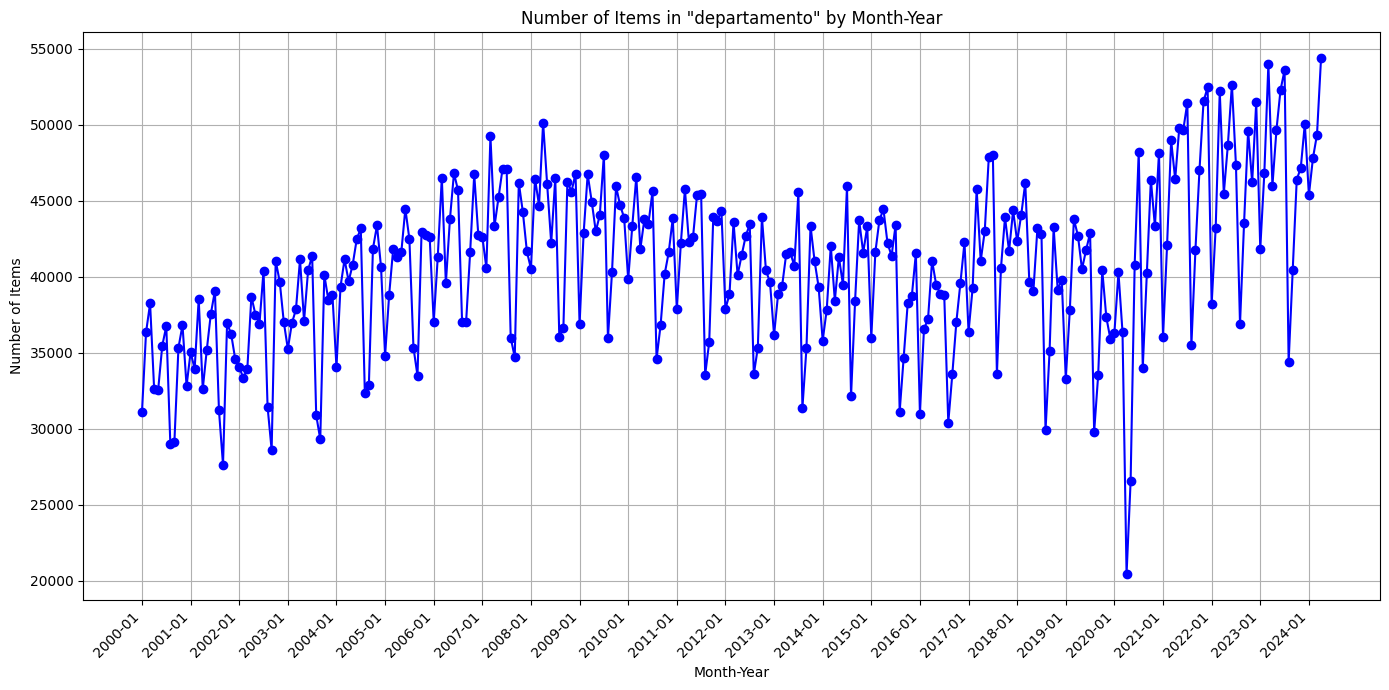

In [4]:
import matplotlib.pyplot as plt
# Create a plot
months = list(sorted_counts_by_month.keys())
counts = list(sorted_counts_by_month.values())

plt.figure(figsize=(14, 7))  # Increase figure size
plt.plot(months, counts, marker='o', linestyle='-', color='b')

# Show only every nth label to reduce clutter
n = 12  # Adjust this value to show fewer/more labels
plt.xticks(months[::n], rotation=45, ha='right', fontsize=10)

plt.xlabel('Month-Year')
plt.ylabel('Number of Items')
plt.title('Number of Items in "departamento" by Month-Year')
plt.grid(True)  # Add grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot
plot_file_path = 'images/items_by_month_year_improved.png'
plt.savefig(plot_file_path)

print(f"Plot saved as {plot_file_path}")
plt.show()

# Temporal Analysis

In [5]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(list(counts_by_month.items()), columns=['Month-Year', 'Count'])
df['Month-Year'] = pd.to_datetime(df['Month-Year'])
df = df.set_index('Month-Year').sort_index()

print(df.head())

            Count
Month-Year       
2000-01-01  31105
2000-02-01  36342
2000-03-01  38251
2000-04-01  32629
2000-05-01  32584


## Stationarity

In [6]:
import statsmodels.tsa.stattools as sts

sts.adfuller(df['Count'])

(np.float64(-1.5058685405367882),
 np.float64(0.5306062840008726),
 12,
 279,
 {'1%': np.float64(-3.4540076534999957),
  '5%': np.float64(-2.8719557347997178),
  '10%': np.float64(-2.5723200648758366)},
 np.float64(5241.651548136539))

Autocorrelation found lag 12. pvalue is 0.53, thus we can not reject the null hypothesis which is that the Time Series is stationary.

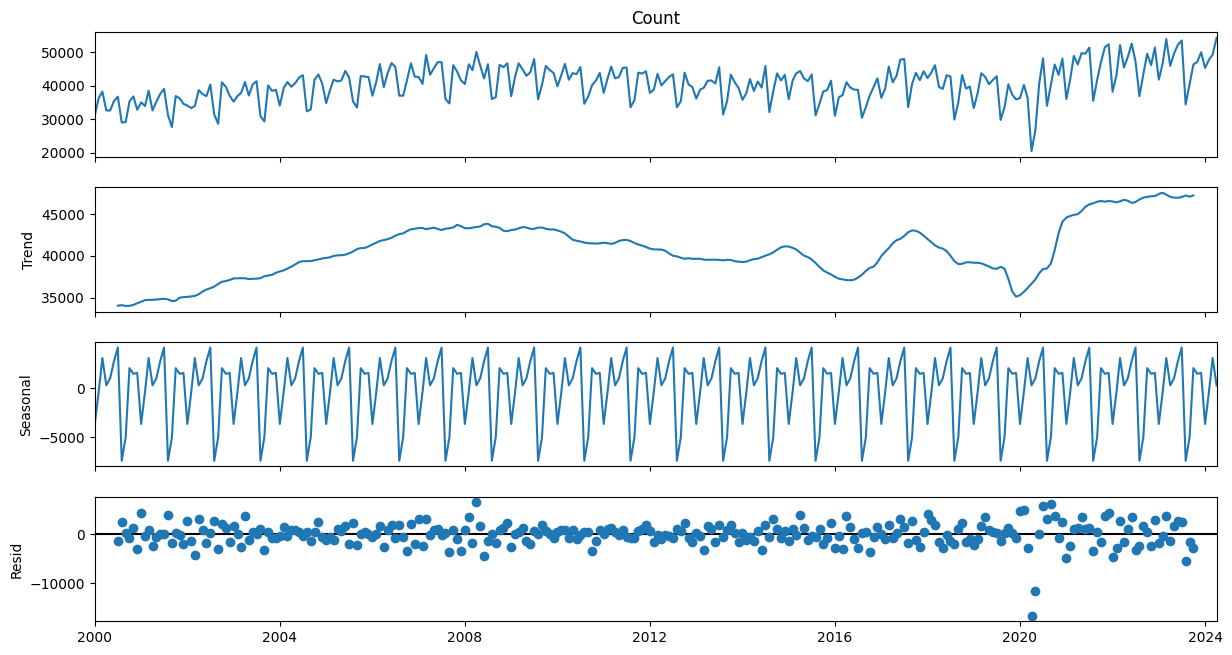

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Count'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

In [8]:
help(decomposition)

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |
 |  Results class for seasonal decompositions
 |
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |
 |  Methods defined here:
 |
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |
 |      Parameters
 |      ----------
 |      observed : bool


In [9]:
print(decomposition.seasonal)
print(type(decomposition.seasonal))

Month-Year
2000-01-01   -3657.746566
2000-02-01    -345.023739
2000-03-01    3087.644739
2000-04-01     296.055971
2000-05-01    1003.836768
                 ...     
2023-12-01    1567.700898
2024-01-01   -3657.746566
2024-02-01    -345.023739
2024-03-01    3087.644739
2024-04-01     296.055971
Name: seasonal, Length: 292, dtype: float64
<class 'pandas.core.series.Series'>


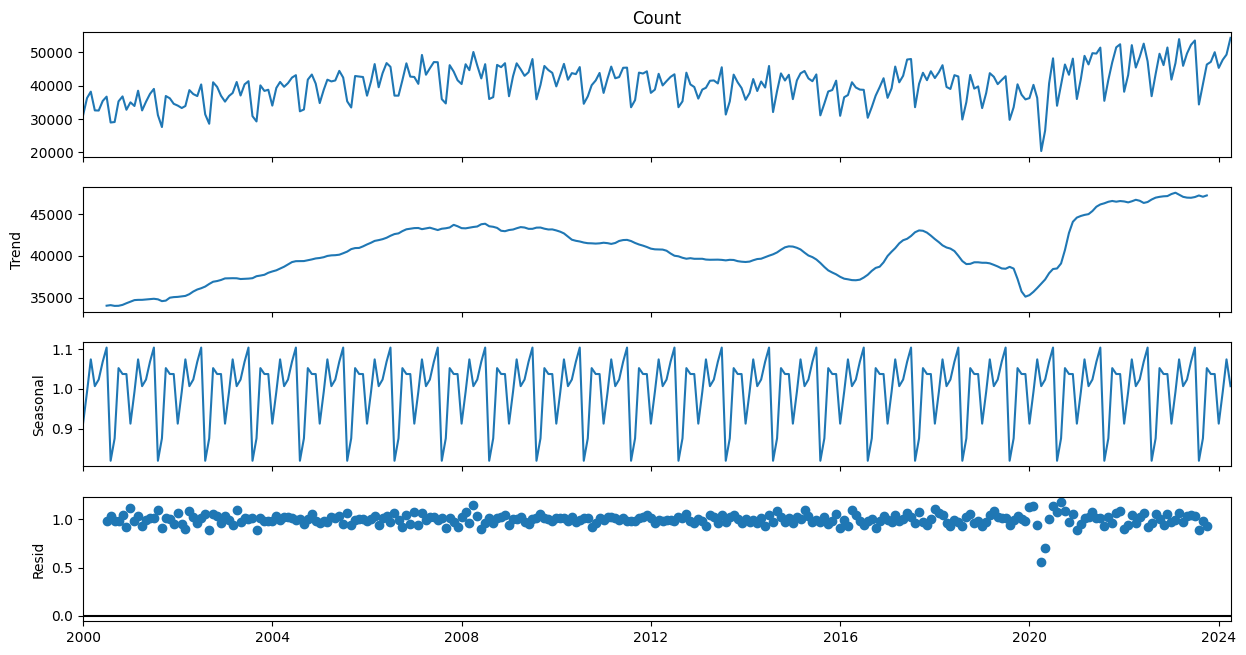

In [13]:
decomposition = seasonal_decompose(df['Count'], model='muliplicative', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

For multiplicative decomposition the residuals does not have zero mean so it is not valid.

In [10]:
df

,Count
Month-Year,
2000-01-01,31105
2000-02-01,36342
2000-03-01,38251
2000-04-01,32629
2000-05-01,32584
...,...
2023-12-01,50083
2024-01-01,45384
2024-02-01,47813


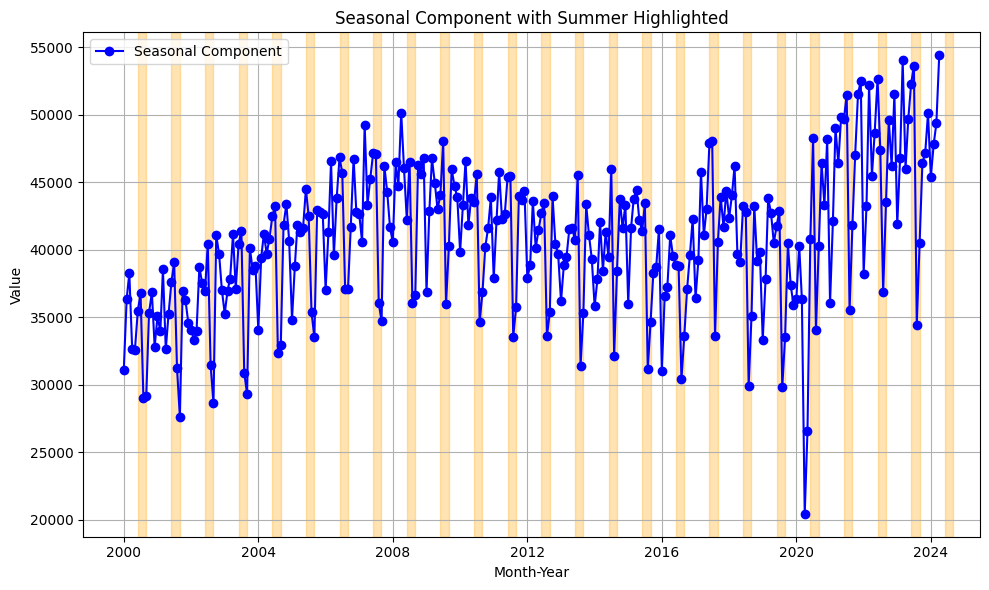

In [11]:
import matplotlib.dates as mdates

# Plot the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Count'], marker='o', linestyle='-', color='blue', label='Seasonal Component')

# Shade the summer months
for year in range(df.index.year.min(), df.index.year.max() + 1):
    plt.axvspan(pd.Timestamp(f'{year}-06-01'), pd.Timestamp(f'{year}-08-31'), color='orange', alpha=0.3)

plt.title('Seasonal Component with Summer Highlighted')
plt.xlabel('Month-Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

- Observed Data: This is the original time series data. It shows fluctuations in the number of items over time, with a general increasing trend and some seasonal variation.

- Trend: This component shows the underlying trend in the data, which is a long-term increase in the number of items. There are some periods of decline or stagnation, particularly around 2012-2015 and a dip around 2018-2019, followed by a rise again.

- Seasonal: This component captures the repeating seasonal patterns in the data. We see a clear annual cycle, indicating that there is a consistent seasonal effect each year. As can be seen in the second picture, the number of pdfs decreases in the summer.

- Residual: This component represents the random noise in the data after removing the trend and seasonal components. Ideally, these residuals should be randomly distributed around zero, indicating a good fit of the model.

<Figure size 1400x700 with 0 Axes>

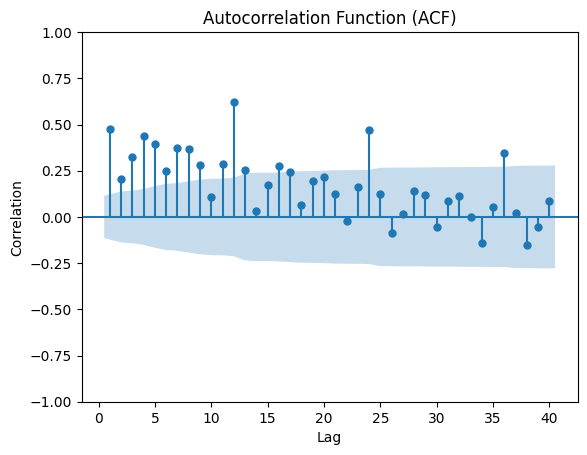

In [16]:
# Plot autocorrelation ACF
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as sgt

# Plot the ACF
plt.figure(figsize=(14, 7))
sgt.plot_acf(df['Count'], lags=40, zero=False) # zero=False to remove the autocorrelation at lag 0
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

The blue area indicates significance, the dots outside of it indicates that they are significantly different frpom zero

<Figure size 1400x700 with 0 Axes>

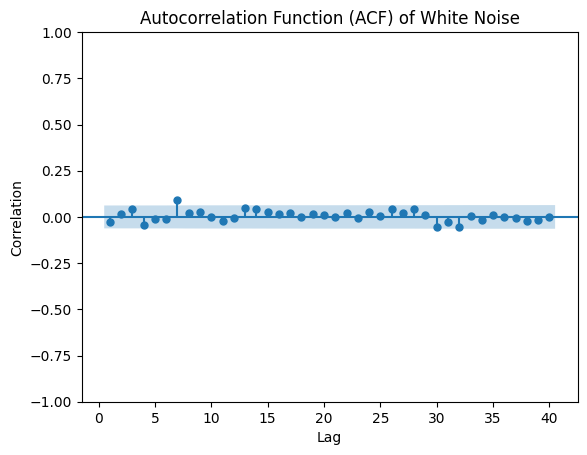

In [17]:
# ACF of white noise
import numpy as np

# Generate white noise
np.random.seed(0)
white_noise = np.random.normal(0, 1, size=1000)

# Plot the ACF of white noise
plt.figure(figsize=(14, 7))
sgt.plot_acf(white_noise, lags=40, zero=False)
plt.title('Autocorrelation Function (ACF) of White Noise')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

<Figure size 1400x700 with 0 Axes>

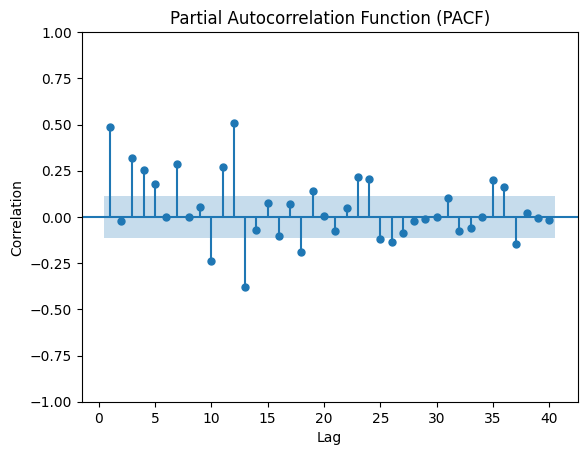

In [19]:
# Partial autocorrelation PACF
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
plt.figure(figsize=(14, 7))
plot_pacf(df['Count'], lags=40, zero=False, method='ols')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

<Figure size 1400x700 with 0 Axes>

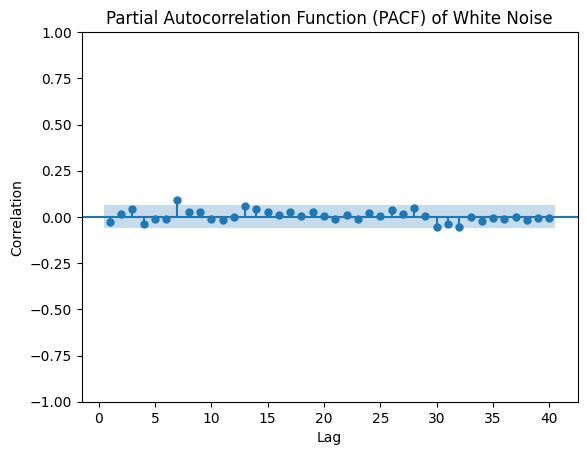

In [21]:
# PACF of white noise
# Plot the PACF of white noise
plt.figure(figsize=(14, 7))

plot_pacf(white_noise, lags=40, zero=False, method='ols')
plt.title('Partial Autocorrelation Function (PACF) of White Noise')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

# Models

## Autoregressive Model (AR)

$X_t = C + \sum \phi_i * x_{t-1} + \varepsilon_t$

$-1 < \phi_i < 1$  

$\varepsilon_t$ residuals

/Users/danielmoreno/tfg_analysis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/danielmoreno/tfg_analysis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/danielmoreno/tfg_analysis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/danielmoreno/tfg_analysis/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2871.655
Date:                Tue, 02 Jul 2024   AIC                           5749.311
Time:                        08:36:52   BIC                           5760.331
Sample:                    01-01-2000   HQIC                          5753.725
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2484      0.064      3.883      0.000       0.123       0.374
ma.L1         -0.8943      0.029    -30.776      0.000      -0.951      -0.837
sigma2        2.3e+07   3.93e-10   5.85e+16      0.0

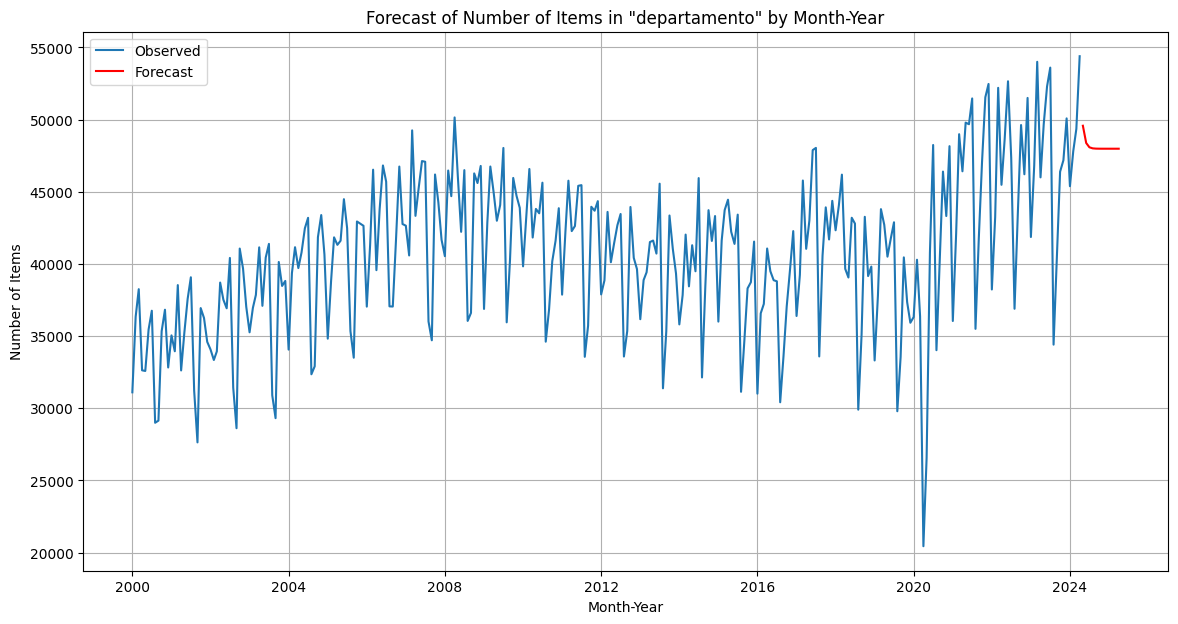

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(df['Count'], order=(1, 1, 1))
fit = model.fit()
print(fit.summary())

# Forecast
forecast = fit.forecast(steps=12)
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Count'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel('Month-Year')
plt.ylabel('Number of Items')
plt.title('Forecast of Number of Items in "departamento" by Month-Year')
plt.legend()
plt.grid(True)
plt.show()

- Observed Data: The blue line represents the observed data, showing the actual number of items over time.

- Forecast: The red line represents the forecasted number of items for the next 12 months based on the ARIMA model. The forecast continues the trend observed in the data, showing a slight increase in the number of items.

- **key observations**:
  - Trend Analysis: From the trend component, we see a long-term increase in the number of items, with some periods of stagnation or decline. This indicates an overall growth in the number of items over the years, despite some fluctuations.

  - Seasonal Patterns: The seasonal component shows a strong annual cycle, indicating that the number of items has a clear seasonal pattern each year. This could be due to specific events or processes that occur at regular intervals annually.

  - Residuals: The residuals seem to be randomly distributed, suggesting that the model has captured the main patterns (trend and seasonality) effectively. However, there are some noticeable outliers that could be investigated further.

  - Forecast: The forecasted values indicate that the number of items is expected to continue increasing slightly over the next year. The model seems to be confident in predicting a continuation of the current trend, albeit with some variability.